# Sentiment analysis with translarion (FR & EN)

In [1]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self-signed certificate in certificate chain
[nltk_data]     (_ssl.c:1028)>


In [ ]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.1/55.1 kB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133.4/133.4 kB 5.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 31.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚

## Si conectas con Drive

In [ ]:
from google.colab import drive

try:
  drive.mount('/content/drive')
except:
  print('Error mounting drive')


file_path_fb = '/content/drive/MyDrive/Colab Notebooks/XBOX/dataset_facebook-comments-scraper_2025-03-21_23-48-03-238.csv'
file_path_ig = '/content/drive/MyDrive/Colab Notebooks/XBOX/dataset_instagram-comment-scraper_2025-03-20_23-50-48-026.csv'
file_path_tt = '/content/drive/MyDrive/Colab Notebooks/XBOX/dataset_tiktok-comments-scraper_2025-03-21_00-45-33-528.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Si es en LOCAL

In [ ]:
#df = pd.read_csv('/Users/tadeonava/Downloads/Apple Latino/dataset_facebook-groups-scraper_2025-04-09_19-37-06-295.csv')
file_path_1 = '/content/drive/MyDrive/Colab Notebooks/XBOX/dataset_facebook-comments-scraper_2025-03-21_23-48-03-238.csv'
file_path_2 = '/content/drive/MyDrive/Colab Notebooks/XBOX/dataset_instagram-comment-scraper_2025-03-20_23-50-48-026.csv'
file_path_3 = '/content/drive/MyDrive/Colab Notebooks/XBOX/dataset_tiktok-comments-scraper_2025-03-21_00-45-33-528.csv'

/var/folders/lh/k_ftm6zs6s7d3lhpy8ybqnj00000gp/T/ipykernel_23528/793417165.py:1: DtypeWarning: Columns (2,4,5,6,11,12,13,14,15,16,18,24,26,28,30,31,32,33,34,35,36,37,38,40,42,43,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,78,84,86,87,88,89,95,98,100,104,105,106,107,108,109,110,112,113,115,116,117,118,132,135,178,180,181,196,205,209,213,214,215,221,222,223,240,248,251,256,257,258,259,260,261,262,263,264,281,287,297,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,367,368,370,371,376,377,378,379,380,382,383,388,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,407,408,409,411,412,414,415,417,418,423,424,425,426,427,428,429,436,437,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,459,460,461,463,464,469,470,471,472,473,474,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,502,504,505,506,511,512,513,514,515,517,522,523

In [ ]:
df_1 = pd.read_csv(file_path_fb)
#df_2 = pd.read_csv(file_path_ig)
#df_3 = pd.read_csv(file_path_tt)

In [ ]:
#Translate all columns from french to english and replace the column itself
import pandas as pd
from googletrans import Translator

def translate_text(text):
    """
    Translates text from French to English.

    Args:
        text (str): The text to translate.

    Returns:
        str: The translated text, or the original text if translation fails.
    """
    try:
        translator = Translator()
        translation = translator.translate(text, src='fr', dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        return text  # Return the original text if translation fails


df_1['text'] = df_1['text'].astype(str).apply(translate_text)
#df_2['text'] = df_2['text'].astype(str).apply(translate_text)
#df_3['text'] = df_3['text'].astype(str).apply(translate_text)

#pd.to_csv(df_1)
#pd.to_csv(df_2)
#pd.to_csv(df_3)

Streaming output truncated to the last 5000 lines.
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'rais

AttributeError: module 'pandas' has no attribute 'to_csv'

In [ ]:
import pandas as pd
import nltk

# ========== (A) If using NLTK‚Äôs VADER ========== #
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

# ========== (B) If using TextBlob ========== #
from textblob import TextBlob

# --------------------------------------------------
# 1) LOAD THE DATA
# --------------------------------------------------
# Replace 'your_data.csv' with the path to your actual CSV.
# Because you showed a snippet with a lot of commas and possibly missing columns,
# you might need to adjust the 'sep' or 'quotechar' parameters if your CSV isn't standard.
#df_1 = pd.read_csv(file_path_fb)  # Use the correct path to your CSV file

# --------------------------------------------------
# 2) CLEAN/SELECT RELEVANT TEXT COLUMNS
# --------------------------------------------------
# In your sample, 'text' is where the comment content seems to be.
# If you have multiple text columns (like "replies/0/text" and "text"),
# you might unify them or handle them separately.

# For example, let's define a function that picks the "text" column if it exists,
# otherwise picks "replies/0/text", etc., as needed.

def extract_comment(row):
    # Attempt to read the 'text' column first
    comment_text = row.get("text", "")
    if not comment_text:
        # Fallback if there's no 'text' or it's empty
        comment_text = row.get("replies/0/text", "")
    return str(comment_text)  # ensure it's a string

# Create a new column "clean_text" with the extracted text
df_1["clean_text"] = df_1.apply(extract_comment, axis=1)
#df_2["clean_text"] = df_2.apply(extract_comment, axis=1)
#df_3["clean_text"] = df_3.apply(extract_comment, axis=1)
# --------------------------------------------------
# 3) PERFORM SENTIMENT ANALYSIS
# --------------------------------------------------
# ========== (A) Using VADER ========== #
def vader_sentiment_score(text):
    # text MUST be a string
    scores = vader_analyzer.polarity_scores(text)
    # 'compound' is the overall sentiment:
    # -1 (most negative) to +1 (most positive).
    return scores["compound"]

# Apply the function to each row in the "clean_text"
df_1["vader_compound_score"] = df_1["clean_text"].apply(vader_sentiment_score)
df_2["vader_compound_score"] = df_2["clean_text"].apply(vader_sentiment_score)
df_3["vader_compound_score"] = df_3["clean_text"].apply(vader_sentiment_score)

# ========== (B) Using TextBlob ========== #
def textblob_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # returns a float between -1.0 and +1.0

df_1["textblob_polarity"] = df_1["clean_text"].apply(textblob_sentiment_score)
df_2["textblob_polarity"] = df_2["clean_text"].apply(textblob_sentiment_score)
df_3["textblob_polarity"] = df_3["clean_text"].apply(textblob_sentiment_score)

# --------------------------------------------------
# 4) INSPECT OR EXPORT RESULTS
# --------------------------------------------------
# Now you have a DataFrame with new columns (like "vader_compound_score" or "textblob_polarity").
# You can inspect or filter the data in memory:
print(df_1[["clean_text", "vader_compound_score", "textblob_polarity"]].head())

# Finally, you can export back to CSV (including the new sentiment columns):
#df_1.to_csv("sentiment_output.csv", index=False)

                                          clean_text  vader_compound_score  \
0  This promo brings together the best rated game...                0.7259   
1  We are more than ready to dive into this adven...                0.7173   
2                    The game that hypes me the most                0.0000   
3                                         Can‚Äôt Wait                0.0000   
4  Big commitment on post about an upcoming game ...                0.3818   

   textblob_polarity  
0               0.55  
1               0.30  
2               0.05  
3               0.00  
4              -0.20  


In [ ]:

# Assuming df has columns 'date' and sentiment scores from TextBlob and VADER
df_1["date"] = pd.to_datetime(df_1["date"])  # Ensure 'date' is in datetime format

# Group by month and calculate average sentiment scores
sentiment_trends_1 = df_1.groupby(df_1["date"].dt.to_period("M")).agg({
    "textblob_polarity": "mean",
    "vader_compound_score": "mean"
}).reset_index()

print(sentiment_trends_1)

# Assuming df has columns 'date' and sentiment scores from TextBlob and VADER
df_2["date"] = pd.to_datetime(df_2["date"])  # Ensure 'date' is in datetime format

# Group by month and calculate average sentiment scores
sentiment_trends_2 = df_2.groupby(df_2["date"].dt.to_period("M")).agg({
    "textblob_polarity": "mean",
    "vader_compound_score": "mean"
}).reset_index()

print(sentiment_trends_2)


# Assuming df has columns 'date' and sentiment scores from TextBlob and VADER
df_3["date"] = pd.to_datetime(df_3["date"])  # Ensure 'date' is in datetime format

# Group by month and calculate average sentiment scores
sentiment_trends_3 = df_3.groupby(df_3["date"].dt.to_period("M")).agg({
    "textblob_polarity": "mean",
    "vader_compound_score": "mean"
}).reset_index()

print(sentiment_trends_3)

def datetime_csv(def name():
    """
    Purpose: 
    """
    # Assuming df has columns 'date' and sentiment scores from TextBlob and VADER
    df["date"] = pd.to_datetime(df_3["date"])  # Ensure 'date' is in datetime format

    # Group by month and calculate average sentiment scores
    sentiment_trends_3 = df_3.groupby(df_3["date"].dt.to_period("M")).agg({
    "textblob_polarity": "mean",
    "vader_compound_score": "mean"
    }).reset_index()
    
# end def

      date  textblob_polarity  vader_compound_score
0  2025-02           0.085271              0.141499
1  2025-03           0.092003              0.098918


<ipython-input-16-55078ef27c1f>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sentiment_trends_1 = df_1.groupby(df_1["date"].dt.to_period("M")).agg({


KeyError: 'date'

In [ ]:
#Percentage of Positive, Neutral, and Negative Comments

# Define categories for TextBlob
df_1["textblob_sentiment_category"] = df_1["textblob_polarity"].apply(
    lambda x: "Positive" if x > 0.2 else ("Negative" if x < -0.2 else "Neutral")
)
df_2["textblob_sentiment_category"] = df_2["textblob_polarity"].apply(
    lambda x: "Positive" if x > 0.2 else ("Negative" if x < -0.2 else "Neutral")
)
df_3["textblob_sentiment_category"] = df_3["textblob_polarity"].apply(
    lambda x: "Positive" if x > 0.2 else ("Negative" if x < -0.2 else "Neutral")
)

# Define categories for VADER
df_1["vader_sentiment_category"] = df_1["vader_compound_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)
df_2["vader_sentiment_category"] = df_2["vader_compound_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)
df_3["vader_sentiment_category"] = df_3["vader_compound_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)

# Calculate percentage of each category

textblob_kpi_1 = df_1["textblob_sentiment_category"].value_counts(normalize=True) * 100
vader_kpi_1 = df_1["vader_sentiment_category"].value_counts(normalize=True) * 100

textblob_kpi_2 = df_2["textblob_sentiment_category"].value_counts(normalize=True) * 100
vader_kpi_2 = df_2["vader_sentiment_category"].value_counts(normalize=True) * 100

textblob_kpi = df_3["textblob_sentiment_category"].value_counts(normalize=True) * 100
vader_kpi = df_3["vader_sentiment_category"].value_counts(normalize=True) * 100

print("TextBlob Sentiment Distribution:\n", textblob_kpi_2)
print("\nVADER Sentiment Distribution:\n", vader_kpi_2)


TextBlob Sentiment Distribution:
 textblob_sentiment_category
Neutral     73.248047
Positive    20.434733
Negative     6.317220
Name: proportion, dtype: float64

VADER Sentiment Distribution:
 vader_sentiment_category
Neutral     57.251217
Positive    29.469037
Negative    13.279746
Name: proportion, dtype: float64


In [ ]:
import re
import pandas as pd

def asignar_tema_multilingue(comentario):
    """Asigna un tema a un comentario en ingl√©s o franc√©s basado en palabras clave refinadas."""
    if not isinstance(comentario, str):
        return 'unknown/inconnu'

    comentario = comentario.lower()

    if re.search(r'(game pass|subscription)', comentario):
        return 'game pass & online gaming'
    elif re.search(r'(console|m/k)', comentario):
        return 'hardware/features'
    elif re.search(r'(support|help)', comentario):
        return 'customer support'
    elif re.search(r'(ps 5|ps5)', comentario):
        return 'console wars'
    elif re.search(r'(retro|remake)', comentario):
        return 'gaming'
    elif re.search(r'(meme|humor|joke|trash)', comentario):
        return 'memes & humor'
    elif re.search(r'(marketing|campagne)', comentario):
        return 'marketing'
    elif re.search(r'(news|announcement)', comentario):
        return 'news & announcements'
    else:
        return 'neutral conversation'


# Aplicar la funci√≥n al DataFrame
df_1['tema_multilingue'] = df_1['text'].astype(str).apply(asignar_tema_multilingue)
df_2['tema_multilingue'] = df_2['text'].astype(str).apply(asignar_tema_multilingue)
df_3['tema_multilingue'] = df_3['text'].astype(str).apply(asignar_tema_multilingue)

# Imprimir los primeros 10 comentarios y sus temas para verificar
#print(df_1[['text', 'tema_multilingue']].head(10))

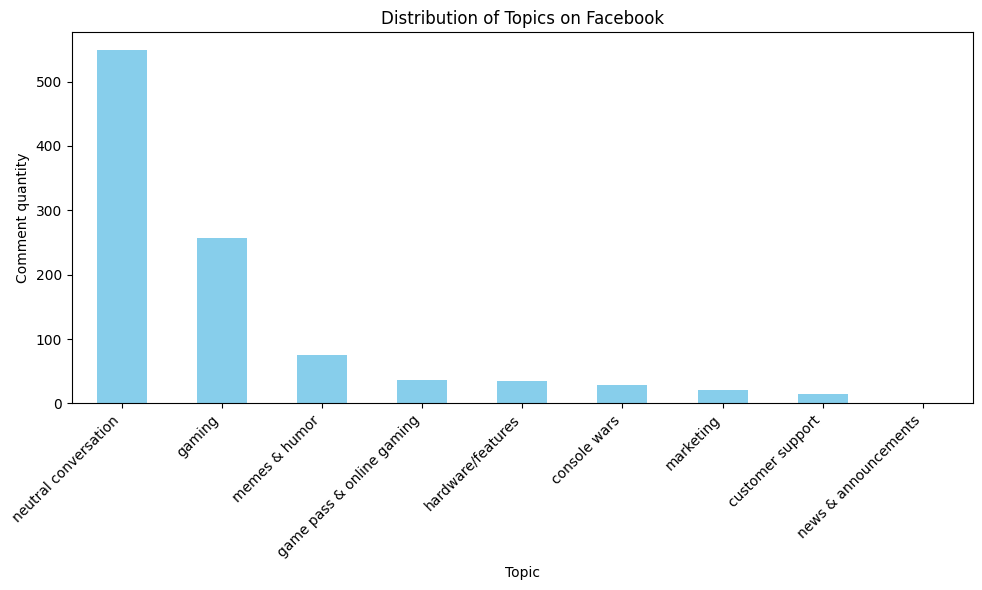

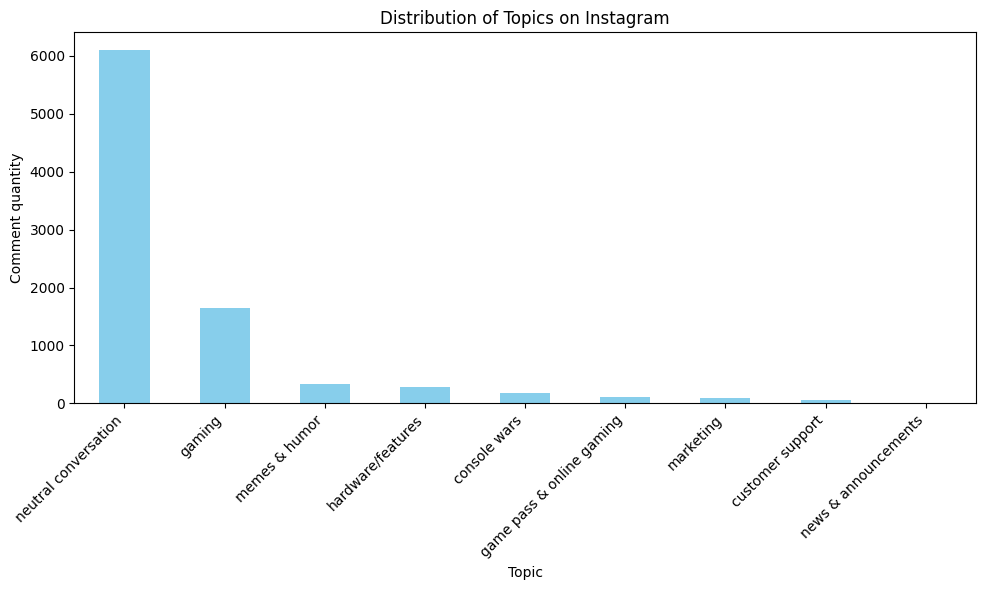

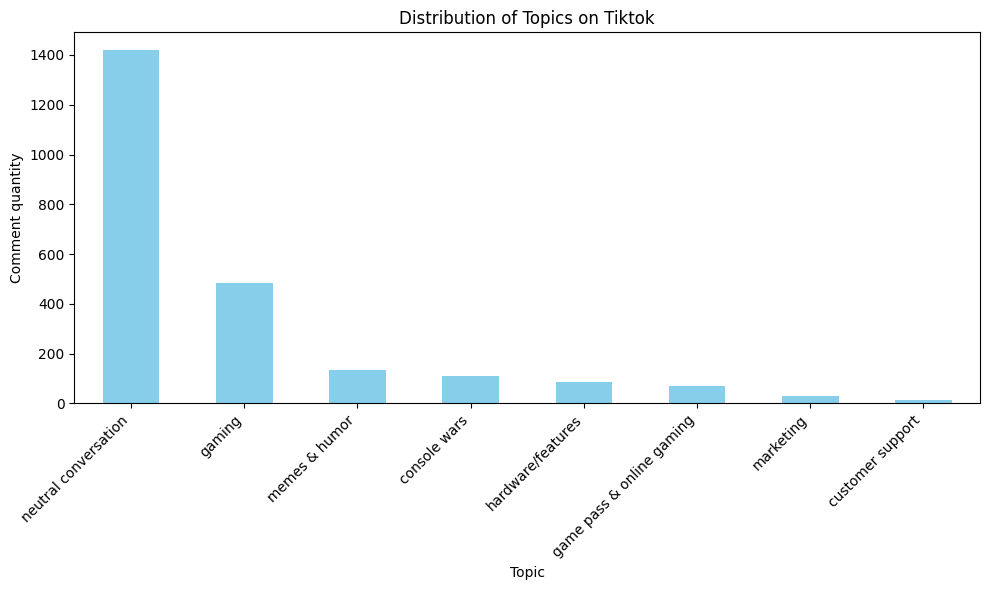

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def visualizar_temas_por_dataframe(dataframes, nombres):
    """Visualiza la distribuci√≥n de temas en cada DataFrame."""
    for i, df in enumerate(dataframes):
        plt.figure(figsize=(10, 6))
        df['tema_multilingue'].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of Topics on {nombres[i]}')
        plt.xlabel('Topic')
        plt.ylabel('Comment quantity')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Ejemplo de uso (reemplaza df1, df2, df3 con tus DataFrames y los nombres correspondientes)
dataframes = [df_1, df_2, df_3]  # Lista de tus DataFrames
nombres = ['Facebook', 'Instagram', 'Tiktok']  # Nombres para los gr√°ficos

visualizar_temas_por_dataframe(dataframes, nombres)

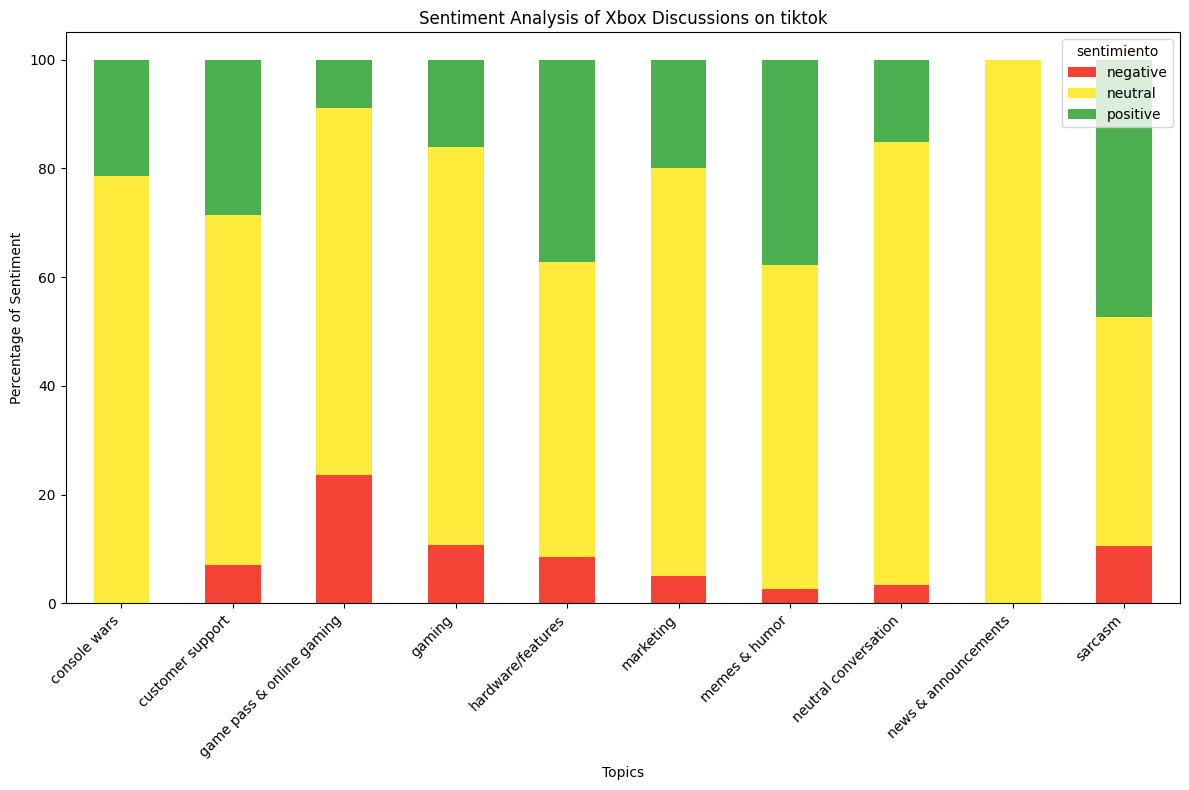

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def crear_grafico_sentimientos_apilado(df):
    """
    Crea un gr√°fico de barras apiladas para visualizar la polaridad por tema.
    """

    # Definir umbrales para polaridad
    umbral_positivo = 0.3
    umbral_negativo = -0.3

    # Funci√≥n para clasificar la polaridad
    def clasificar_polaridad(polaridad):
        if polaridad > umbral_positivo:
            return 'positive'
        elif polaridad < umbral_negativo:
            return 'negative'
        else:
            return 'neutral'

    # Clasificar polaridad y agrupar por tema y polaridad
    df['sentimiento'] = df['textblob_polarity'].apply(clasificar_polaridad)
    grouped = df.groupby(['tema_multilingue', 'sentimiento']).size().unstack(fill_value=0)

    # Calcular porcentajes
    total = grouped.sum(axis=1)
    percentages = grouped.div(total, axis=0) * 100

    #Colores
    colores = {
        'positive': '#4CAF50',  # Verde
        'neutral': '#FFEB3B',   # Amarillo
        'negative': '#F44336'   # Rojo
    }

    # Crear gr√°fico de barras apiladas
    percentages.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colores['negative'], colores['neutral'], colores['positive']])
    plt.title('Sentiment Analysis of Xbox Discussions on tiktok')
    plt.xlabel('Topics')
    plt.ylabel('Percentage of Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso (reemplaza df1, df2, df3 con tus DataFrames y los nombres correspondientes)
#dataframes = [df_1, df_2, df_3]  # Lista de tus DataFrames
#nombres = ['Facebook', 'Instagram', 'Tiktok']  # Nombres para los gr√°ficos

crear_grafico_sentimientos_apilado(df_1)

In [ ]:
df_1['text']

0       This promo brings together the best rated game...
1       We are more than ready to dive into this adven...
2                         The game that hypes me the most
3                                              Can‚Äôt Wait
4       Big commitment on post about an upcoming game ...
                              ...                        
1013                   Raymond Cello She is a great lady.
1014    PETYR WATT TELL HER I'LL BY LATER, and the Din...
1015             Raymond Cello Typical Fake Gamer moment.
1016        Dalton McIntosh Hello How Are You Doing Today
1017    Sam Cvet Shall We Talk about Sony Spending 400...
Name: text, Length: 1018, dtype: object

In [ ]:
'''
#For any DOUBT ABOUT PHRASE
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Analyze the sentiment
text = "ran out of game pass"
vs = analyzer.polarity_scores(text)

# Print the compound score
print(f"Compound score: {vs['compound']}")

# Determine if the sentiment is positive or negative
if vs['compound'] > 0.3:
    print("The sentiment is positive.")
elif vs['compound'] < -0.3:
    print("The sentiment is negative.")
else:
    print("The sentiment is neutral.")
'''

Compound score: 0.0
The sentiment is neutral.


In [ ]:
#This bloq add more sensibility to the cathegorization adding filter of sarcasm

import re
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inicializar VADER
analyzer = SentimentIntensityAnalyzer()

# Lista de palabras y frases sarc√°sticas (puedes modificarla)
sarcasm_keywords = [
    "yeah right", "oh great", "just what I needed", "love it when",
    "totally", "sure", "amazing...", "fantastic", "wonderful", "of course",
    "obviously", "brilliant", "what a surprise", "superb", "so much fun"
]

# Ajuste para penalizar sarcasmo en VADER (puedes cambiarlo)
sarcasm_penalty = 0.5  # Reduce el valor de sentimiento para comentarios sarc√°sticos

def detect_sarcasm(comentario):
    """Detecta sarcasmo en un comentario basado en palabras clave."""
    if not isinstance(comentario, str):
        return False
    comentario = comentario.lower()
    return any(pattern in comentario for pattern in sarcasm_keywords)

def vader_sentiment_adjusted(comentario, is_sarcastic):
    """Aplica VADER y ajusta el puntaje si el comentario es sarc√°stico."""
    sentiment = analyzer.polarity_scores(comentario)['compound']

    if is_sarcastic:
        return sentiment - sarcasm_penalty  # Penaliza el sarcasmo
    return sentiment

def asignar_tema_multilingue(comentario):
    """Asigna un tema a un comentario en ingl√©s o franc√©s basado en palabras clave refinadas."""
    if not isinstance(comentario, str):
        return 'unknown/inconnu'

    comentario = comentario.lower()

    if detect_sarcasm(comentario):
        return 'sarcasm'
    elif re.search(r'(game pass|subscription|xbox live|xboxlive|online gaming|internet|fps|gamepass|abonnement|jeux en ligne|en ligne|internet|fps|xcloud|cloud gaming)', comentario):
        return 'game pass & online gaming'
    elif re.search(r'(console|hardware|graphics|performance|ram|processor|nvidia|4k|hd|display|controller|joystick|console|mat√©riel|graphiques|performance|ram|processeur|nvidia|4k|hd|affichage|manette|joystick|m/k)', comentario):
        return 'hardware/features'
    elif re.search(r'(support|help|bugs|error|errors|debugging|support|aide|bogues|erreur|erreurs|d√©bogage|fix your captures app|fix the online)', comentario):
        return 'customer support'
    elif re.search(r'(ps 5|ps5|playstation5|nintendo|playstation|steam|pc|god of war|mario|mario kart|GTA|zelda|mortalk kombat|gay|ps5|playstation|nintendo|steam|pc|god of war|mario|zelda|superior console)', comentario):
        return 'console wars'
    elif re.search(r'(retro|remake|xbox|Xbox|Xbox 360|upcoming game|wait|game|gaming|videogames|playing|multiplayer|singleplayer|shooter|rpg|horror|adventure|action|jeu|jeux vid√©o|jouer|multijoueur|solo|tir|rpg|horreur|aventure|action|tony hawk|thps|avowed|halo|monster hunter|shredders|ssx|gamepass|warzone|cod|call of duty|ac:shadows)', comentario):
        return 'gaming'
    elif re.search(r'(meme|humor|joke|funny|drole|blague|comique|jaja|lol|xd|ü§£ü§£|üòÇ|ü§£|ü§°|ü§Æ|poop|shitshow|nibbas|awoked|woke|trash)', comentario):
        return 'memes & humor'
    elif re.search(r'(marketing|advertising|anounce|campaign|cost|promotion|available|promo|buy|sale|ready|commercialisation|publicit√©|annonce|campagne|co√ªt|promotion|disponible|promo|acheter|vente|pr√™t|pre-order|preorder|merch)', comentario):
        return 'marketing'
    elif re.search(r'(news|announcement|reveal|updates|nouvelles|annonce|r√©v√©lation|mises √† jour)', comentario):
        return 'news & announcements'
    else:
        return 'neutral conversation'

# Aplicar la funci√≥n al DataFrame
for df in [df_1, df_2, df_3]:
    df['is_sarcastic'] = df['text'].astype(str).apply(detect_sarcasm)  # Detecta sarcasmo
    df['tema_multilingue'] = df['text'].astype(str).apply(asignar_tema_multilingue)  # Asigna tema
    df['vader_sentiment'] = df.apply(lambda row: vader_sentiment_adjusted(row['text'], row['is_sarcastic']), axis=1)  # Ajusta VADER

# Imprimir los primeros 10 comentarios y sus datos
print(df_1[['text', 'tema_multilingue', 'is_sarcastic', 'vader_sentiment']].head(10))


                                                text      tema_multilingue  \
0  This promo brings together the best rated game...                gaming   
1  We are more than ready to dive into this adven...                gaming   
2                    The game that hypes me the most                gaming   
3                                         Can‚Äôt Wait                gaming   
4  Big commitment on post about an upcoming game ...          console wars   
5                                                nan  neutral conversation   
6                                This.Is. Pandering!  neutral conversation   
7                                   So original ü§£ü§£ü§Æü§Æ         memes & humor   
8  Message received:\n\nThe new Action and Surviv...     hardware/features   
9  I was super excited about this until i found o...  neutral conversation   

   is_sarcastic  vader_sentiment  
0         False           0.7259  
1         False           0.7173  
2         False       

In [ ]:
df_1.describe()

attachments/0/animated_image  attachments/0/animated_image/height  \
count                           0.0                            16.000000   
mean                            NaN                           379.937500   
std                             NaN                           124.543148   
min                             NaN                           180.000000   
25%                             NaN                           300.000000   
50%                             NaN                           358.500000   
75%                             NaN                           484.500000   
max                             NaN                           640.000000   

       attachments/0/animated_image/width  attachments/0/audio_settings  \
count                           16.000000                           0.0   
mean                           417.687500                           NaN   
std                            130.888104                           NaN   
min                            164.000000                           NaN   
25%                            316.000000                           NaN   
50%                            489.000000                           NaN   
75%                            498.000000                           NaN   
max                            548.000000                           NaN   

       attachments/0/broadcast_id  attachments/0/broadcast_low_latency_config  \
count                         0.0                                         0.0   
mean                          NaN                                         NaN   
std                           NaN                                         NaN   
min                           NaN                                         NaN   
25%                           NaN                                         NaN   
50%                           NaN                                         NaN   
75%                           NaN                                         NaN   
max                           NaN                                         NaN   

       attachments/0/broadcast_status  attachments/0/broadcaster_origin  \
count                             0.0                               0.0   
mean                              NaN                               NaN   
std                               NaN                               NaN   
min                               NaN                               NaN   
25%                               NaN                               NaN   
50%                               NaN                               NaN   
75%                               NaN                               NaN   
max                               NaN                               NaN   

       attachments/0/captions_settings  attachments/0/captions_url  ...  \
count                              0.0                         0.0  ...   
mean                               NaN                         NaN  ...   
std                                NaN                         NaN  ...   
min                                NaN                         NaN  ...   
25%                                NaN                         NaN  ...   
50%                                NaN                         NaN  ...   
75%                                NaN                         NaN  ...   
max                                NaN                         NaN  ...   

       comments/4/threadingDepth  commentsCount    facebookId  likesCount  \
count                        1.0     253.000000  1.018000e+03  1018.00000   
mean                         2.0       2.948617  1.037010e+15     1.33890   
std                          NaN       3.805975  8.090861e+12     4.45761   
min                          2.0       1.000000  1.025299e+15     0.00000   
25%                          2.0       1.000000  1.031315e+15     0.00000   
50%                          2.0       2.000000  1.035974e+15     0.00000   
75%                      